In [1]:
from pathlib import Path
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from PIL import Image, UnidentifiedImageError
from tqdm import tqdm

scripts_dir = Path("C:/Users/apoch/Desktop/dissertation/scripts")
data_dir = Path("C:/Users/apoch/Desktop/dissertation/dataset")

if str(scripts_dir) not in sys.path:
    sys.path.insert(0, str(scripts_dir))

from data_loader import list_all_parts
from utils import show_sample_images

In [2]:
part_folders = list_all_parts(data_dir)

data_records = []
for part_path in part_folders:
    label = part_path.parent.name + '/' + part_path.name
    images = list(part_path.glob("*.jpg"))
    for img in images:
        data_records.append((label, str(img)))

df = pd.DataFrame(data_records, columns=["label", "path"])
df["category"] = df["label"].apply(lambda x: x.split('/')[0])
df["part"] = df["label"].apply(lambda x: x.split('/')[1])

df.head()

,label,path,category,part
0,Internal/Console,C:\Users\apoch\Desktop\dissertation\dataset\In...,Internal,Console
1,Internal/Console,C:\Users\apoch\Desktop\dissertation\dataset\In...,Internal,Console
2,Internal/Console,C:\Users\apoch\Desktop\dissertation\dataset\In...,Internal,Console
3,Internal/Console,C:\Users\apoch\Desktop\dissertation\dataset\In...,Internal,Console
4,Internal/Console,C:\Users\apoch\Desktop\dissertation\dataset\In...,Internal,Console


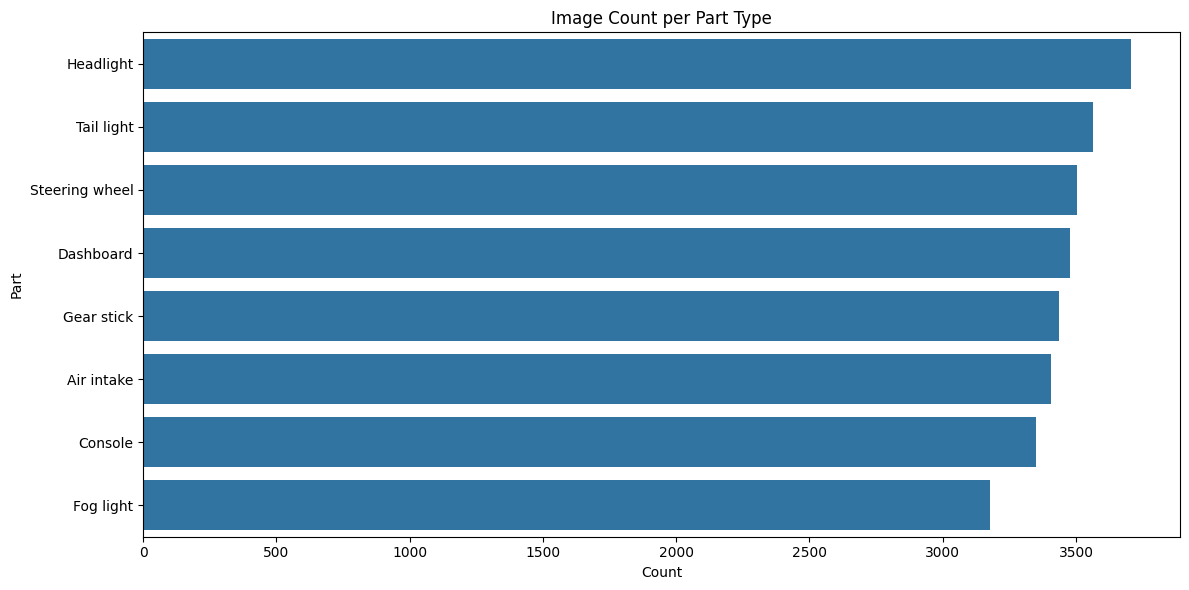

In [3]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="part", order=df["part"].value_counts().index)
plt.title("Image Count per Part Type")
plt.xlabel("Count")
plt.ylabel("Part")
plt.tight_layout()
plt.show()

In [4]:
def get_image_stats(img_path):
    try:
        img = Image.open(img_path)
        return img.size[0], img.size[1], len(img.getbands())
    except UnidentifiedImageError:
        return None, None, None
tqdm.pandas()
df[["width", "height", "channel"]] = df["path"].progress_apply(lambda x: pd.Series(get_image_stats(x)))

df.dropna(inplace=True)

100%|██████████| 27618/27618 [00:10<00:00, 2569.61it/s]


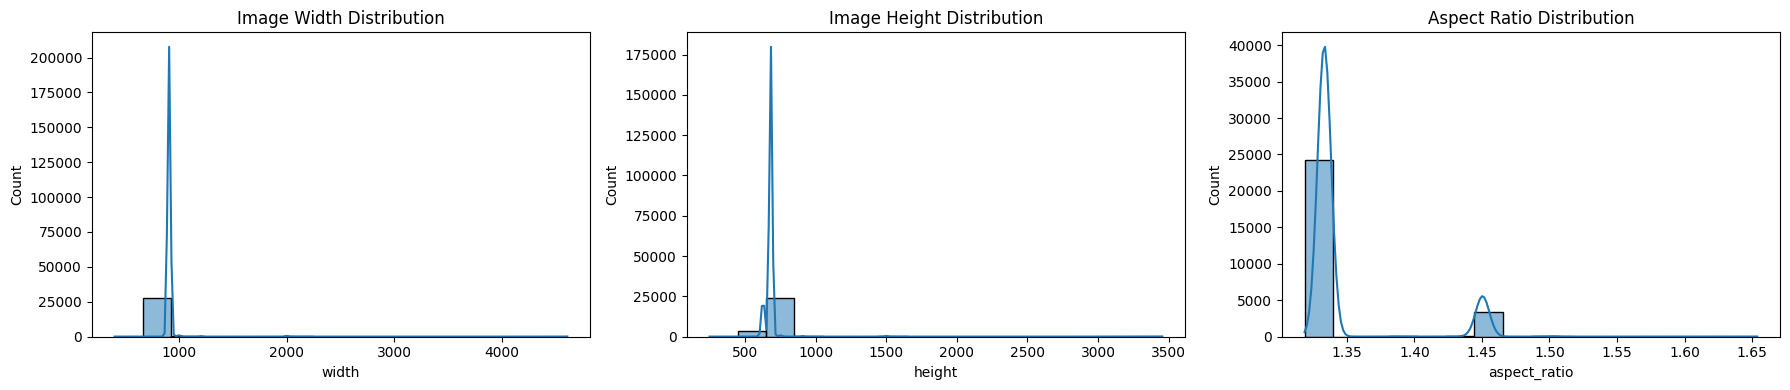

In [5]:
df["aspect_ratio"] = df["width"] / df["height"]

fig, axs = plt.subplots(1, 3, figsize=(18, 4))
sns.histplot(df["width"], kde=True, ax=axs[0])
axs[0].set_title("Image Width Distribution")

sns.histplot(df["height"], kde=True, ax=axs[1])
axs[1].set_title("Image Height Distribution")

sns.histplot(df["aspect_ratio"], kde=True, ax=axs[2])
axs[2].set_title("Aspect Ratio Distribution")

plt.tight_layout()
plt.show()

In [6]:
corrupted=df[df["width"].isnull() | df["height"].isnull()]
print(f"Corrupted images found: {len(corrupted)}")

df["is_square"] = df["width"] == df["height"]
print(f"Non-square images: {len(df) - df["is_square"].sum()}")

Corrupted images found: 0
Non-square images: 27618


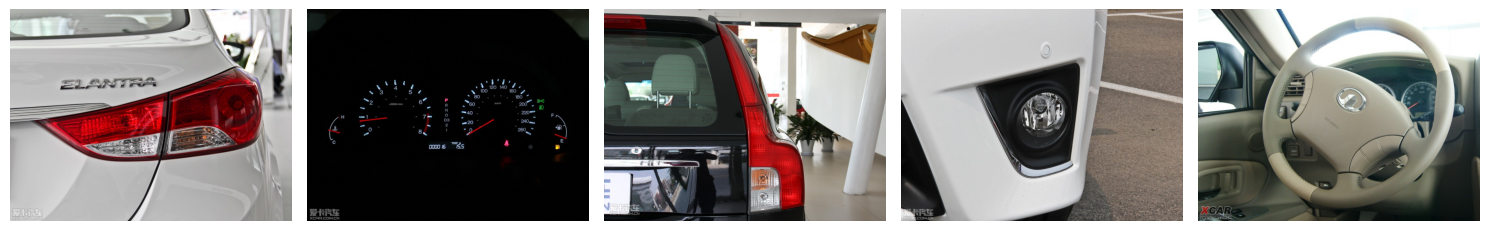

In [7]:
import random
sample_paths = df.sample(5)["path"].tolist()
sample_images = [cv2.imread(p) for p in sample_paths]
show_sample_images(sample_images)